# Figures for casual plotting (DF)
This notebook contains casual plotting for general tasks regarding DF project.

## General guidelines

- Figure organization
    - Figures will be organized under corresponding sections (h2 title). 
    - Subfigures (panels) will be under subsections (h3 title). 
    - Each subsection should be self-complete, meaning that to plot a certain figure, only the code in that specific section needs to be run, except importing packages (which should always be the first thing to run when starting the notebook.
- Ideas and plans that haven't been implemented should be listed in the **Plans** block, in <font color='blue'>blue color</font>.

## <font color='blue'> Plans

<font color='blue'>
    
- ...
</font>

## Table of content
1. Giant number fluctuation illustration
    - (a) plot $\Delta N/\sqrt N$ as a function of $N$
    - (b) ...

## 0 Packages

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
from skimage import io
import typesetting.main as tm
tm.prl('1-column-2-panel')

## 1 Giant number fluctuation illustration
### 1.1 (a) plot $\Delta N/\sqrt N$ as a function of $N$

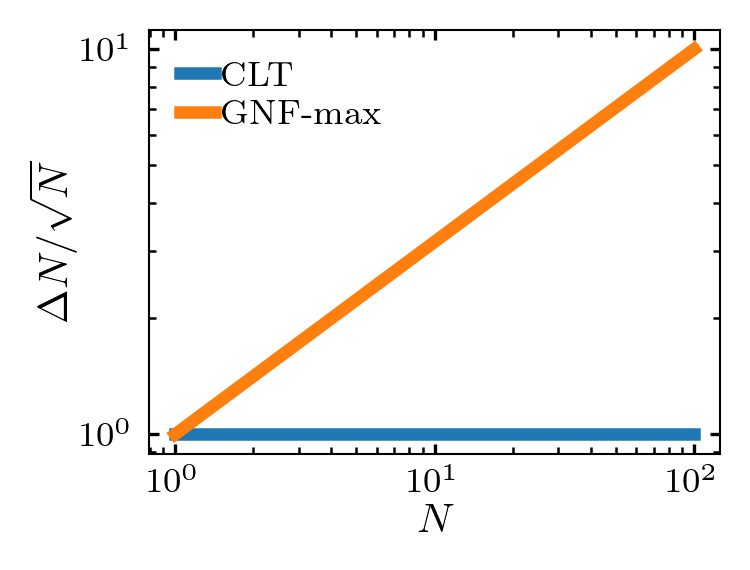

In [15]:
x = np.linspace(1, 100)
y1 = x ** 0
y2 = x ** 0.5

fig, ax = plt.subplots(figsize=(2.6, 2), dpi=300)
ax.plot(x, y1, lw=3, label='CLT')
ax.plot(x, y2, lw=3, label='GNF-max')
ax.loglog()

ax.set_xlabel('$N$')
ax.set_ylabel('$\Delta N/\sqrt N$')
ax.legend()
plt.tight_layout()

fig.savefig(r'E:\Github\PhD-thesis\Figs\1-Intro\GNF\GNF-illustration.pdf')